In [11]:
import numpy as np
import pandas as pd
import string #special operations on string
import spacy #Language models

import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from wordcloud import WordCloud
%matplotlib inline

In [29]:
# load the dataset
data=pd.read_csv('Elon_musk.csv',encoding='Latin-1')
data.drop(['Unnamed: 0'],inplace=True,axis=1)
data

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [31]:
data.isna().sum()

Text    0
dtype: int64

In [32]:
data=[Text.strip() for Text in data.Text] 
data=[Text for Text in data if Text] 
data

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [33]:
# Joining the list into one string/text
text=' '.join(data)
text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [34]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [35]:
#Removing Punctuation
no_punc_text = text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewal

In [37]:
#Tokenization
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [41]:
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
text_tokens

['kunalb11',
 'I\x92m',
 'an',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'joerogan',
 'Spotify',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'is',
 'underestimated',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'httpstco9WFKMYu2oj',
 'Frodo',
 'was',
 'the',
 'underdoge',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'httpstcozGxJFDzzrM',
 'OwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed',
 'Tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likely',
 'GiveDirectly',
 'Just',
 'sent',
 'some',
 'Just',
 'agree',
 'to',
 'do',
 

In [42]:
len(text_tokens)

21078

In [43]:
#Removing Stopwords
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [44]:
my_stop_words = stopwords.words("english")
for i in my_stop_words:
  print(i,end = ",")

i,me,my,myself,we,our,ours,ourselves,you,you're,you've,you'll,you'd,your,yours,yourself,yourselves,he,him,his,himself,she,she's,her,hers,herself,it,it's,its,itself,they,them,their,theirs,themselves,what,which,who,whom,this,that,that'll,these,those,am,is,are,was,were,be,been,being,have,has,had,having,do,does,did,doing,a,an,the,and,but,if,or,because,as,until,while,of,at,by,for,with,about,against,between,into,through,during,before,after,above,below,to,from,up,down,in,out,on,off,over,under,again,further,then,once,here,there,when,where,why,how,all,any,both,each,few,more,most,other,some,such,no,nor,not,only,own,same,so,than,too,very,s,t,can,will,just,don,don't,should,should've,now,d,ll,m,o,re,ve,y,ain,aren,aren't,couldn,couldn't,didn,didn't,doesn,doesn't,hadn,hadn't,hasn,hasn't,haven,haven't,isn,isn't,ma,mightn,mightn't,mustn,mustn't,needn,needn't,shan,shan't,shouldn,shouldn't,wasn,wasn't,weren,weren't,won,won't,wouldn,wouldn't,

In [45]:
len(my_stop_words)

179

In [51]:
#removing stopwords
no_stop_token = []
for i in text_tokens:
  if i != my_stop_words:
    no_stop_token.append(i) 
no_stop_token

['kunalb11',
 'I\x92m',
 'an',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'joerogan',
 'Spotify',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'is',
 'underestimated',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'httpstco9WFKMYu2oj',
 'Frodo',
 'was',
 'the',
 'underdoge',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'httpstcozGxJFDzzrM',
 'OwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed',
 'Tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likely',
 'GiveDirectly',
 'Just',
 'sent',
 'some',
 'Just',
 'agree',
 'to',
 'do',
 

In [52]:
len(no_stop_token)

21078

In [54]:
#Converting into LowerCase
lower_words = [x.lower() for x in no_stop_token]
print(lower_words[0:25])

['kunalb11', 'i\x92m', 'an', 'alien', 'idaacarmack', 'ray', 'tracing', 'on', 'cyberpunk', 'with', 'hdr', 'is', 'nextlevel', 'have', 'you', 'tried', 'it', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'is', 'underestimated']


In [55]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
stemmed_tokens

['kunalb11',
 'i\x92m',
 'an',
 'alien',
 'idaacarmack',
 'ray',
 'trace',
 'on',
 'cyberpunk',
 'with',
 'hdr',
 'is',
 'nextlevel',
 'have',
 'you',
 'tri',
 'it',
 'joerogan',
 'spotifi',
 'great',
 'interview',
 'gtera27',
 'doge',
 'is',
 'underestim',
 'teslacn',
 'congratul',
 'tesla',
 'china',
 'for',
 'amaz',
 'execut',
 'last',
 'year',
 'now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'happi',
 'new',
 'year',
 'of',
 'the',
 'ox',
 'httpstco9wfkmyu2oj',
 'frodo',
 'wa',
 'the',
 'underdog',
 'all',
 'thought',
 'he',
 'would',
 'fail',
 'himself',
 'most',
 'of',
 'all',
 'httpstcozgxjfdzzrm',
 'owenspark',
 'flcnhvi',
 'anonyx10',
 'haha',
 'thank',
 'flcnhvi',
 'anonyx10',
 'inde',
 'tweet',
 'definit',
 'do',
 'not',
 'repres',
 'realworld',
 'time',
 'alloc',
 'the',
 'most',
 'entertain',
 'outcom',
 'is',
 'the',
 'most',
 'like',
 'givedirectli',
 'just',
 'sent',
 'some',
 'just',
 'agre',
 'to',
 'do',
 'clubhous',
 'with',
 'kanyewest',
 'httpstco

In [56]:
#Lemmatizer
nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [57]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in lower_words]
lemmatized_tokens[0:25]

['kunalb11',
 'i\x92m',
 'an',
 'alien',
 'idaacarmack',
 'ray',
 'tracing',
 'on',
 'cyberpunk',
 'with',
 'hdr',
 'is',
 'nextlevel',
 'have',
 'you',
 'tried',
 'it',
 'joerogan',
 'spotify',
 'great',
 'interview',
 'gtera27',
 'doge',
 'is',
 'underestimated']

In [58]:
#Featrue Extraction
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features = 100 )
X = vectorizer.fit_transform(lemmatized_tokens)

In [59]:
#creating a dataframe
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending = False).head(20)

,0
you,99
yes,98
year,97
yeah,96
would,95
with,94
will,93
wholemarsblog,92
what,91
we,90


In [60]:
X

<21078x100 sparse matrix of type '<class 'numpy.int64'>'
	with 8148 stored elements in Compressed Sparse Row format>

In [61]:
print(X.toarray().shape)

(21078, 100)


In [62]:
#Let's see how can bigrams and trigrams can be included here
vectorizer_ngram_range = CountVectorizer(analyzer = "word",ngram_range=(1,3),max_features = 100)
bow_matrix_ngram = vectorizer_ngram_range.fit_transform(lemmatized_tokens)

In [63]:
vectorizer_ngram_range.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['about',
 'all',
 'also',
 'amp',
 'an',
 'and',
 'are',
 'at',
 'be',
 'but',
 'by',
 'can',
 'car',
 'cleantechnica',
 'day',
 'do',
 'dragon',
 'engine',
 'engineersfeed',
 'erdayastronaut',
 'falcon',
 'first',
 'flcnhvy',
 'flight',
 'for',
 'from',
 'good',
 'great',
 'ha',
 'haha',
 'have',
 'he',
 'high',
 'idaacarmack',
 'if',
 'in',
 'is',
 'it',
 'just',
 'kristennetten',
 'launch',
 'like',
 'lot',
 'make',
 'marcushousegame',
 'maybe',
 'more',
 'most',
 'much',
 'my',
 'nasa',
 'nasaspaceflight',
 'need',
 'new',
 'no',
 'not',
 'of',
 'on',
 'one',
 'or',
 'our',
 'out',
 'people',
 'ppathole',
 'probably',
 'rationaletienne',
 're',
 'rt',
 'should',
 'so',
 'some',
 'spacestation',
 'spacex',
 'starship',
 'sure',
 'tesla',
 'teslaownerssv',
 'teslarati',
 'than',
 'that',
 'the',
 'there',
 'they',
 'this',
 'time',
 'to',
 'too',
 'true',
 'u0001f923u0001f923',
 'wa',
 'we',
 'what',
 'wholemarsblog',
 'will',
 'with',
 'would',
 'yeah',
 'year',
 'yes',
 'you']

In [64]:
bow_matrix_ngram.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [65]:
#TFID Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_n_gram_max_features = TfidfVectorizer(norm = "l2",analyzer = "word",ngram_range = (1,3),max_features= 100)
tf_idf_matrix_n_gram_max_features = vectorizer_n_gram_max_features.fit_transform(lemmatized_tokens)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['about', 'all', 'also', 'amp', 'an', 'and', 'are', 'at', 'be', 'but', 'by', 'can', 'car', 'cleantechnica', 'day', 'do', 'dragon', 'engine', 'engineersfeed', 'erdayastronaut', 'falcon', 'first', 'flcnhvy', 'flight', 'for', 'from', 'good', 'great', 'ha', 'haha', 'have', 'he', 'high', 'idaacarmack', 'if', 'in', 'is', 'it', 'just', 'kristennetten', 'launch', 'like', 'lot', 'make', 'marcushousegame', 'maybe', 'more', 'most', 'much', 'my', 'nasa', 'nasaspaceflight', 'need', 'new', 'no', 'not', 'of', 'on', 'one', 'or', 'our', 'out', 'people', 'ppathole', 'probably', 'rationaletienne', 're', 'rt', 'should', 'so', 'some', 'spacestation', 'spacex', 'starship', 'sure', 'tesla', 'teslaownerssv', 'teslarati', 'than', 'that', 'the', 'there', 'they', 'this', 'time', 'to', 'too', 'true', 'u0001f923u0001f923', 'wa', 'we', 'what', 'wholemarsblog', 'will', 'with', 'would', 'yeah', 'year', 'yes', 'you']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0

In [66]:
#Generate Wordcloud
from wordcloud import WordCloud,STOPWORDS
#Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize = (40,30))
    plt.imshow(wordcloud)
    plt.axis("off");

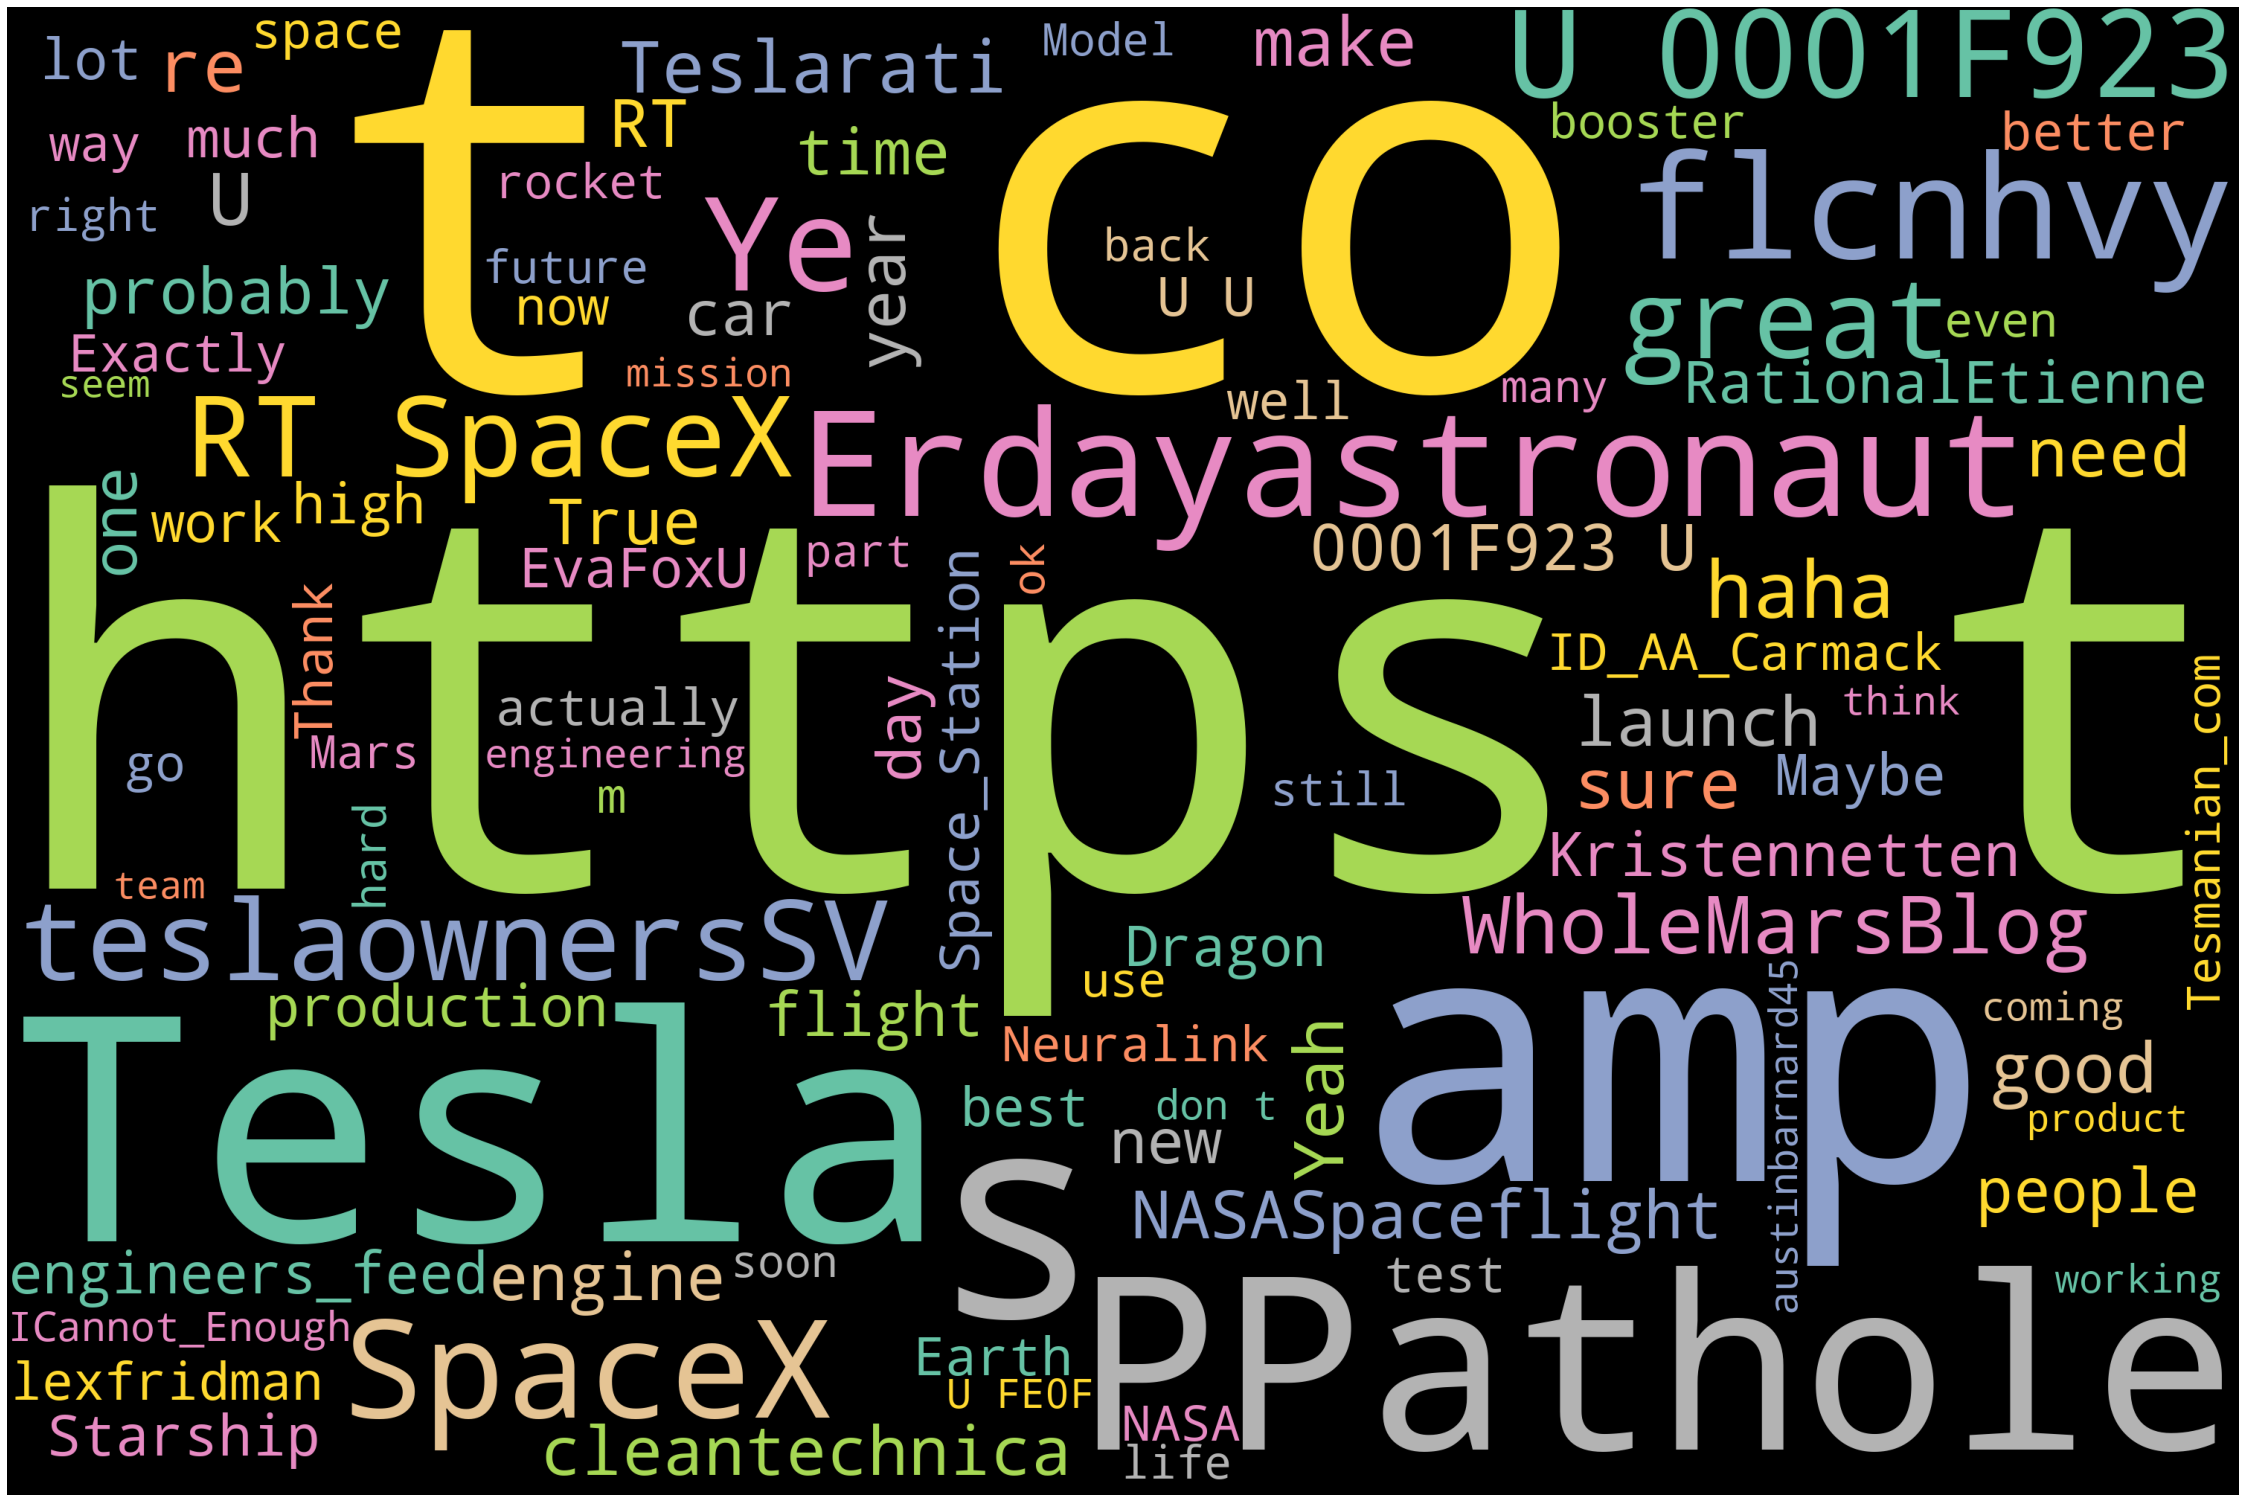

In [68]:
#adding stopwords and generate worldcloud
stopwords = STOPWORDS
wordcloud = WordCloud(width = 3000, height = 2000, background_color = "black",max_words = 100, colormap = "Set2",
                     stopwords = stopwords).generate(text)
#plot
plot_cloud(wordcloud) 